In [1]:
# For dealing with categorical data
from sklearn.preprocessing import LabelBinarizer, KBinsDiscretizer

KBD = KBinsDiscretizer(encode='onehot-dense')

In [2]:
#I will be working with Pandas Dataframes throughout project
import pandas as pd

In [3]:
#our datavisualization libraries
import seaborn as sns
from seaborn import lmplot

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates


import numpy as np
from scipy import stats

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
#Import the correct dataframe 
df = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

In [6]:
# To import column name descriptions included within project
from IPython.display import display, Markdown

# using Ipython.display to read and display different file  
# from project folder within this notebook
with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [7]:
# save duplicated rows into separate dataframe for further analysis
# get rid of duplicated rows
duplicated_id = pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

# The last listed price for each ID is the most recently used information 
# therefore the most accurate representation of housing market
df['id'].drop_duplicates(keep='last',inplace=True)

# The ID has served its purpose and will deprecate regression models so drop this column first
df = df.drop(["id"], axis=1)

In [8]:
# view is the correct datatype already
# However, there are missing values to be dealt with

df['view'].isnull().sum()
#63 

df['view'].value_counts()
#0.0    19422
#2.0      957
#3.0      508
#1.0      330
#4.0      317
#Name: view, dtype: int64

#replace NaN with 0
df['view'].fillna(0,inplace=True)

In [9]:
#I'm turning yr_renovated into a boolean to show if the house has ever been renovated or not because there are
#So few renovated houses on-hot encoding does not make a lot of sense

df['yr_renovated'].isnull().sum()
#3842
df['yr_renovated'].value_counts().head()
#0.0       17011
#2014.0       73
#2003.0       31
#2013.0       31
#2007.0       30
df['yr_renovated'].fillna(0,inplace=True)

df['yr_renovated'].isnull().sum()
df['yr_renovated'] = df['yr_renovated'].astype(bool)
df['renovated'] = df['yr_renovated']

In [10]:
#waterfront also needs to be turned into a boolean value 1 has waterview, 0 does not
#change datatype to Boolean
df['waterfront'] = df['waterfront'].astype('bool')

In [11]:
#Date needs to be converted into datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [12]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [13]:
df['sqft_basement'].value_counts().head();
#0.0      12826
#?          454
#600.0      217
#500.0      209
#700.0      208
#Name: sqft_basement, dtype: int64

In [14]:
df.loc[df['sqft_basement'] == '?',['sqft_living','sqft_above']];
#454 rows

In [15]:
df.loc[(df["sqft_basement"] == '?') & (df["sqft_above"]!=df['sqft_living'])];
#170 rows that I can with some confidence say they have a basement

In [16]:
#Replace ? with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='?', value = abs(df['sqft_above']-df['sqft_living']), inplace=True)

In [17]:
df['sqft_basement'].describe();
#count     21597
#unique      397
#top         0.0
#freq      12826
#Name: sqft_basement, dtype: object

In [18]:
#convert the column into a numeric in preperation for becoming boolean
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [19]:
df['sqft_basement'] = df['sqft_basement'].astype(bool)
df['basement'] = df['sqft_basement']
# The sqft_basement has served its purpose and will be replaces by a more simple basement column
# The sqft_living is also being removed due to it containing the square footage of basement in some 
# instances.  In realestate only the sqft_above should be included when listed.
df = df.drop(["sqft_basement", "sqft_living","yr_renovated"], axis=1)

Question 1: How are the houses spread out geographically in regards to ordinal variables such as grade, condition, number of floors, view?

In [20]:
#group all of the ordinal features together
ord_features = ["view", "condition",
                  "grade","bedrooms", 
                 "bathrooms", "floors"]

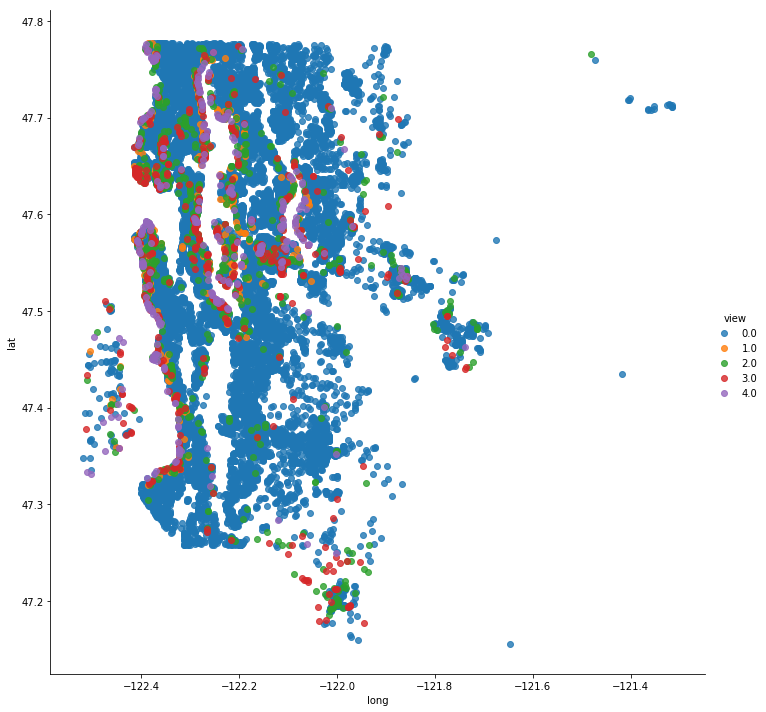

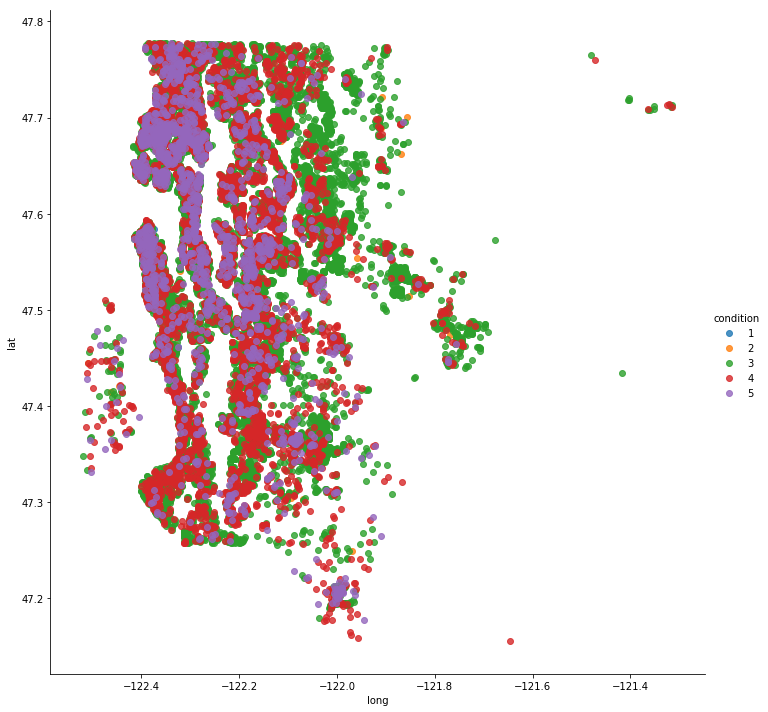

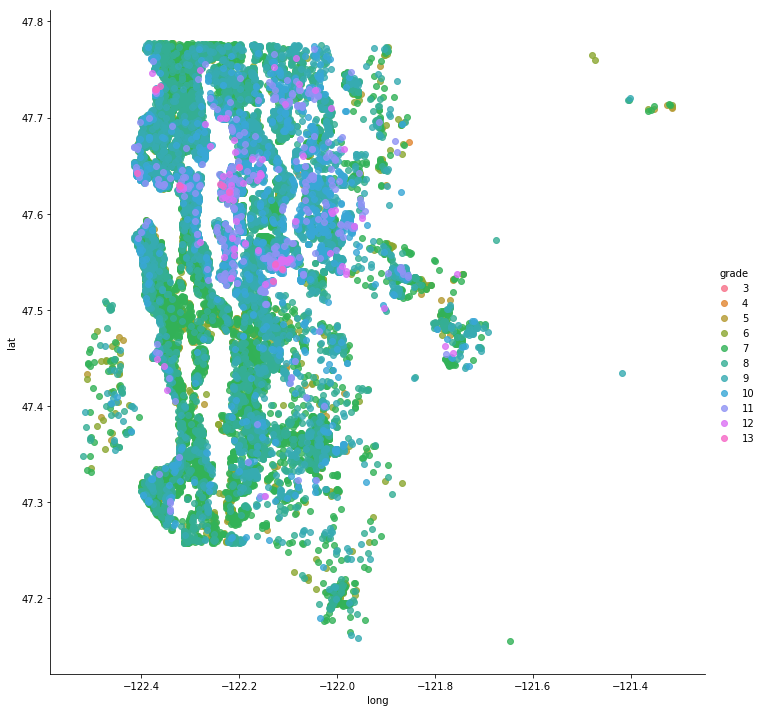

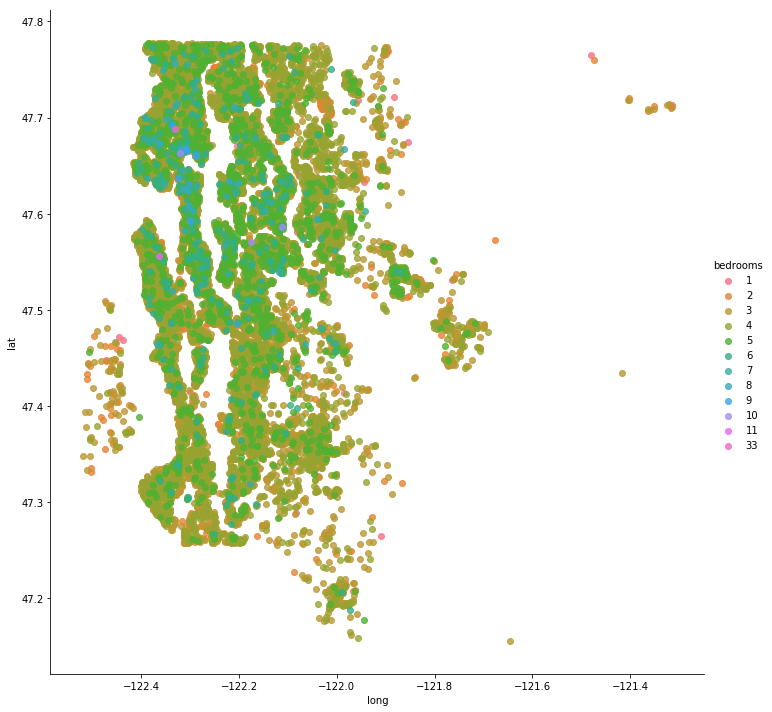

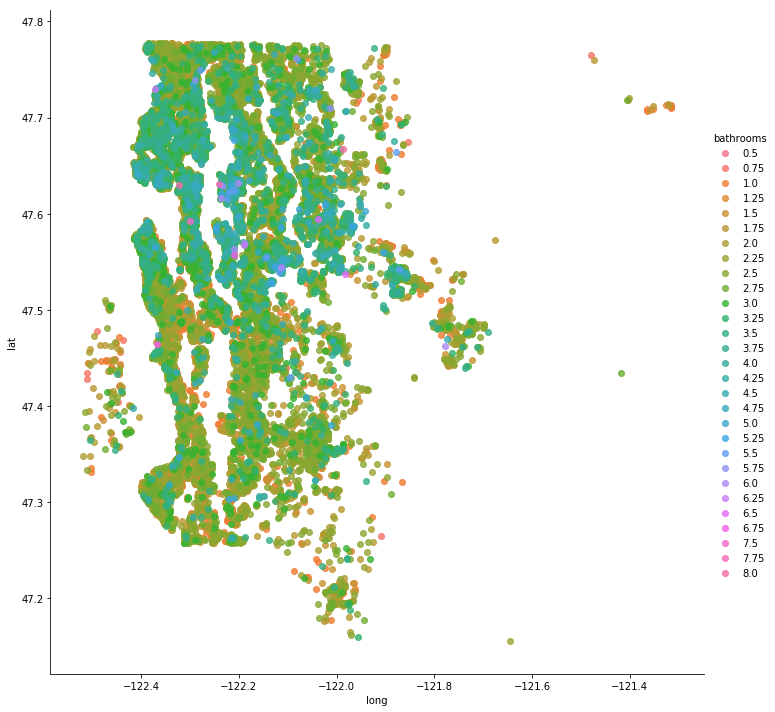

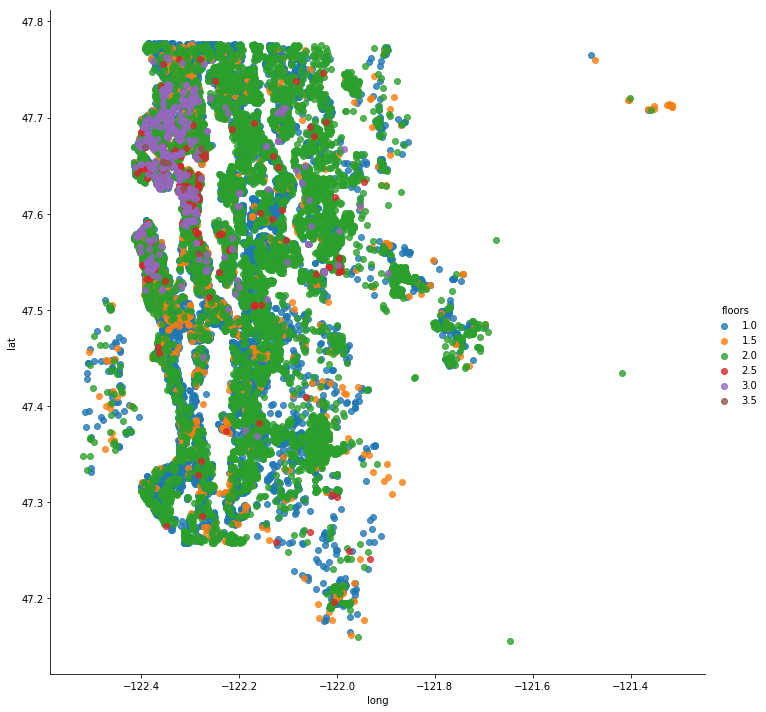

In [21]:
#run the features through lmplot as a forloop to build graph
for x in ord_features:

    lmplot(data=df, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()


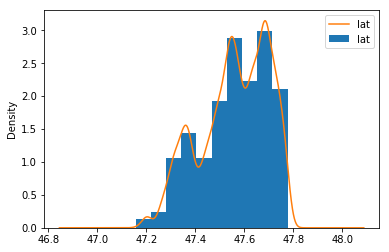

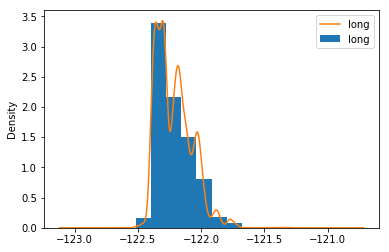

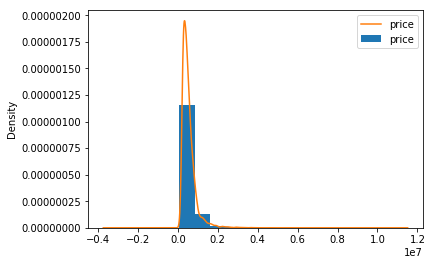

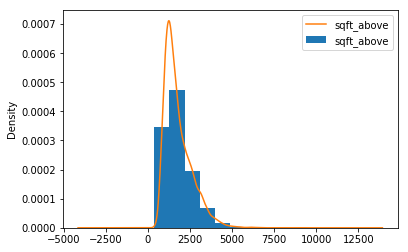

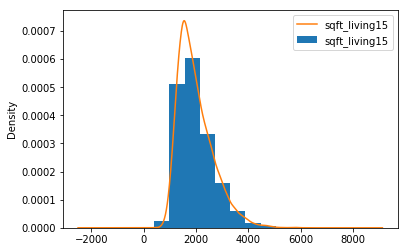

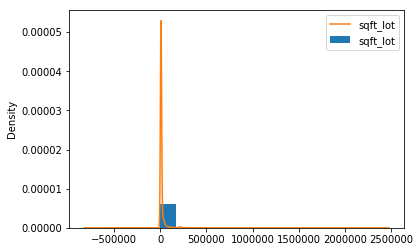

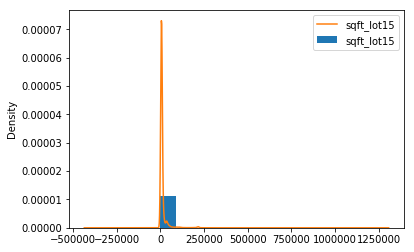

In [22]:
# plot the data for continuous before normalizing and scaling
for column in ['lat', 'long', 'price', 
               "sqft_above", "sqft_living15", 
               "sqft_lot", "sqft_lot15",
              ]:
    df[column].plot.hist(density=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

In [23]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null bool
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null bool
basement         21597 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(6), int64(9)
memory usage: 2.7 MB


In [24]:
#group all of the boolean features together
bool_features = ["waterfront", "basement",
                  "renovated"]

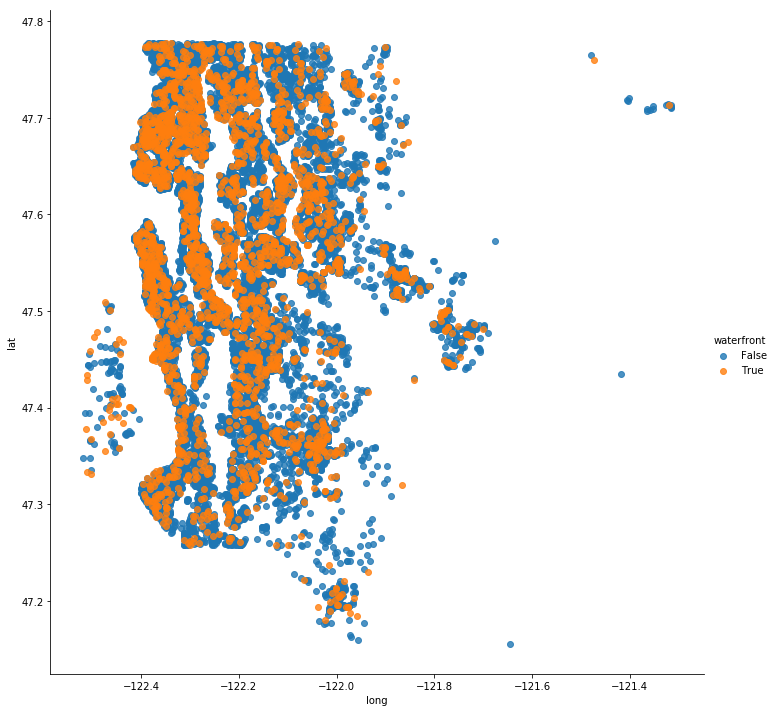

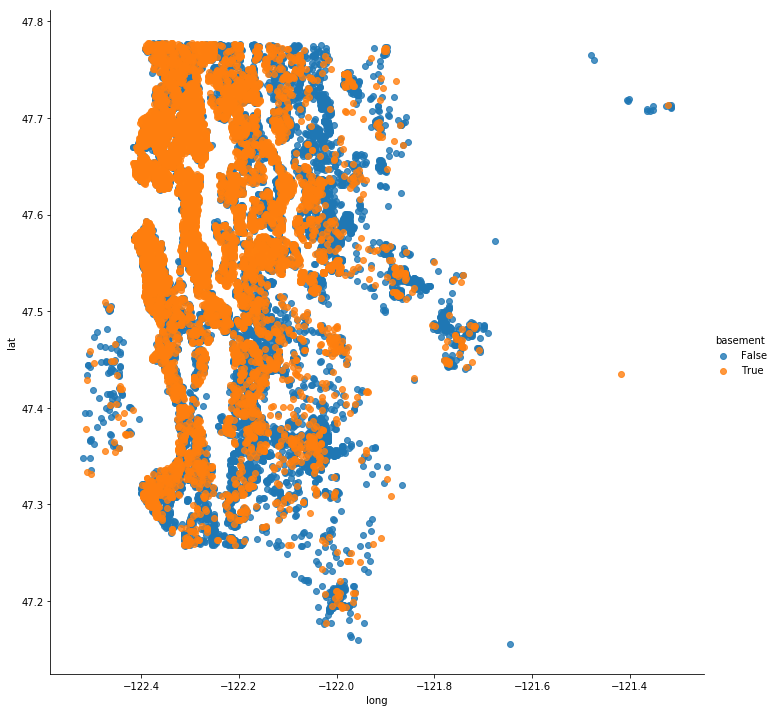

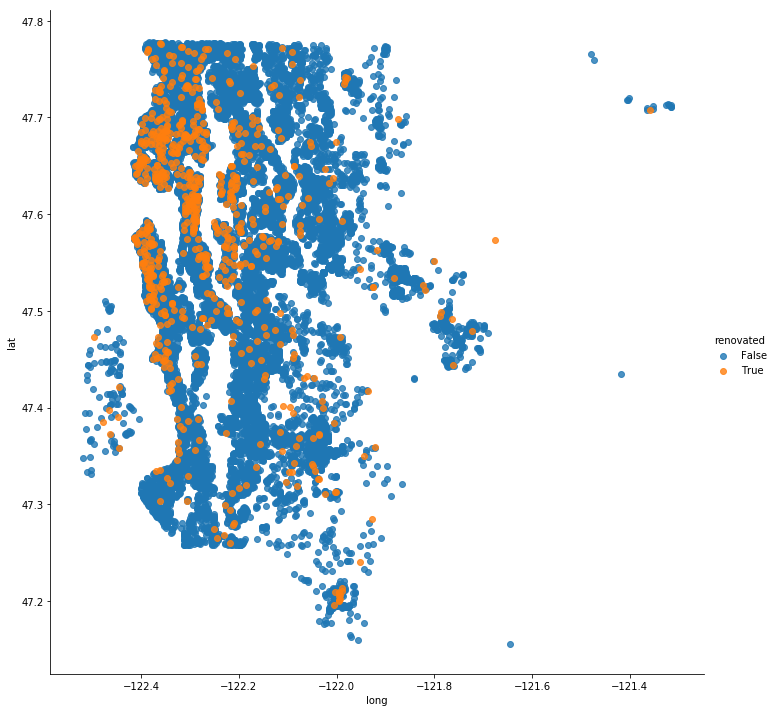

In [25]:
#run the features through lmplot as a forloop to build graph
for x in bool_features:

    lmplot(data=df, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()

We can tell from the graph above that Waterfront is not accurate data and needs to be dropped.

In [26]:
#df = df.drop(["waterfront"], axis=1)

Further into the project I used google earth to see how this may be accurate some places right next to the water are obstructed by lots of trees.

In [27]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
0 2014-10-13  221900.0         3       1.00      5650     1.0        True   
1 2014-12-09  538000.0         3       2.25      7242     2.0       False   

   view  condition  grade  sqft_above  yr_built  zipcode      lat     long  \
0   0.0          3      7        1180      1955    98178  47.5112 -122.257   
1   0.0          3      7        2170      1951    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  renovated  basement  
0           1340        5650      False     False  
1           1690        7639       True      True

Deal with continuous features normalization and scaling

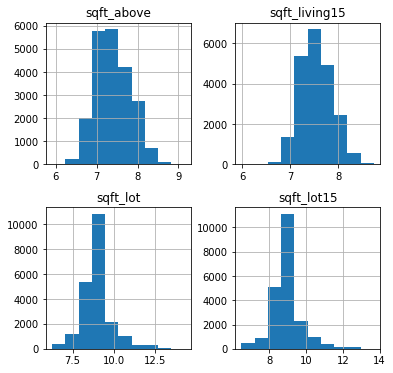

In [28]:
# Create a pandas Dataframe to store normalized values
data_log= pd.DataFrame([])

#log transform each of the values.  
data_log["sqft_lot"] = np.log(df["sqft_lot"])
data_log["sqft_above"] = np.log(df["sqft_above"])
data_log["sqft_living15"] = np.log(df["sqft_living15"])
data_log["sqft_lot15"] = np.log(df["sqft_lot15"])

#graph the results to verify normalization
data_log.hist(figsize  = [6, 6]);

In [29]:
#store newly normalized values into variables for easier access
logabove = data_log["sqft_above"]
loglot = data_log["sqft_lot"]
loglot15 = data_log["sqft_lot15"]
loglive15 = data_log["sqft_living15"]

In [30]:


#use min/max scaling to standardize values between 0 and 1
df["sqft_above"] = (logabove-min(logabove))/(max(logabove)-min(logabove))
df["sqft_living15"] = (loglive15-min(loglive15))/(max(loglive15)-min(loglive15))
df["sqft_lot"] = (loglot-min(loglot))/(max(loglot)-min(loglot))
df["sqft_lot15"]   = (loglot15-min(loglot15))/(max(loglot15)-min(loglot15))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


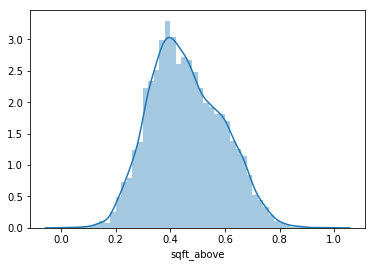

In [31]:
sns.distplot(df.sqft_above)

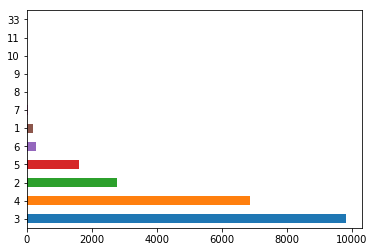

In [32]:
fig, ax = plt.subplots()
df['bedrooms'].value_counts().plot(ax=ax, kind='barh');

Eliminate outliers

In [33]:
df= df[(df['bedrooms'] <= 5) & (df['bathrooms'] >=2)]

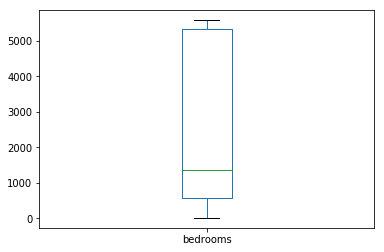

In [34]:
fig, ax = plt.subplots()
df['bedrooms'].value_counts().plot(ax=ax, kind='box');

Our model is only reliable for predicting 2-5 bedroom houses now

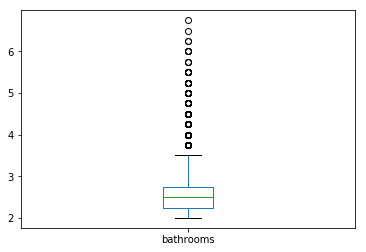

In [35]:
df['bathrooms'].plot(kind='box');

In [36]:
stats.describe(df.bathrooms)

DescribeResult(nobs=12867, minmax=(2.0, 6.75), mean=2.5852374290821483, variance=0.25165772964823213, skewness=1.8082455161126072, kurtosis=5.367300524914759)

In [37]:
df= df[(df['bathrooms'] <= 3.5) & (df['bathrooms'] >=2)]

In [38]:
stats.describe(df.bathrooms)

DescribeResult(nobs=12409, minmax=(2.0, 3.5), mean=2.525465388024821, variance=0.15094720643005774, skewness=0.8833533830228568, kurtosis=0.5102497838492548)

Now our model is only good for predicting 2-5 beds with 2-3.5 bath houses

In [39]:
df.shape

(12409, 19)

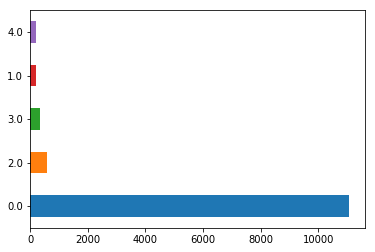

In [40]:
fig, ax = plt.subplots()
df['view'].value_counts().plot(ax=ax, kind='barh');

I need to fix the views column there are too many zero values

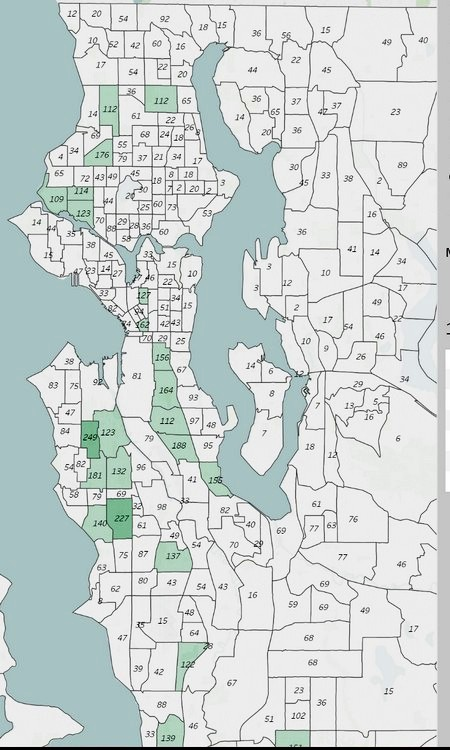

In [41]:
from IPython.display import Image
Image("Kingscounty.jpg")

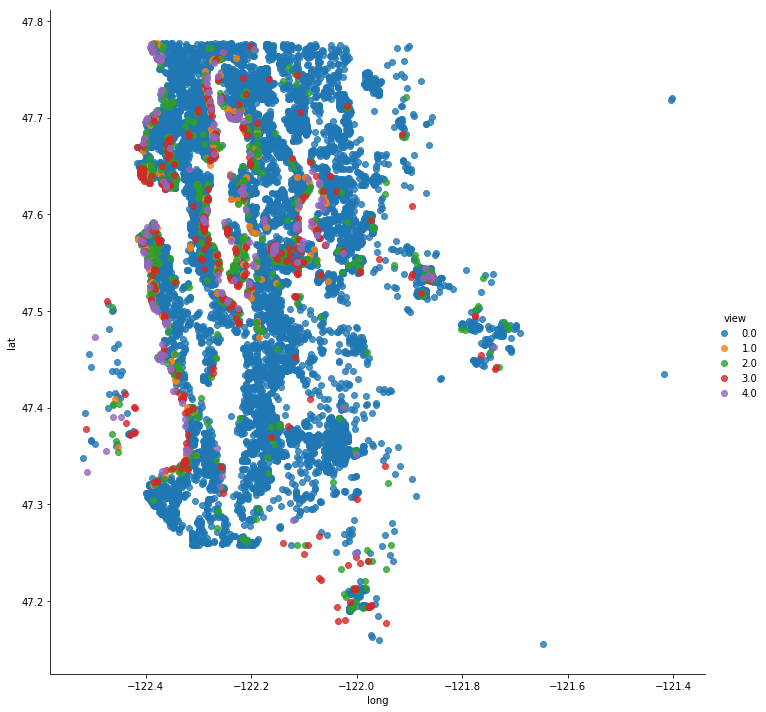

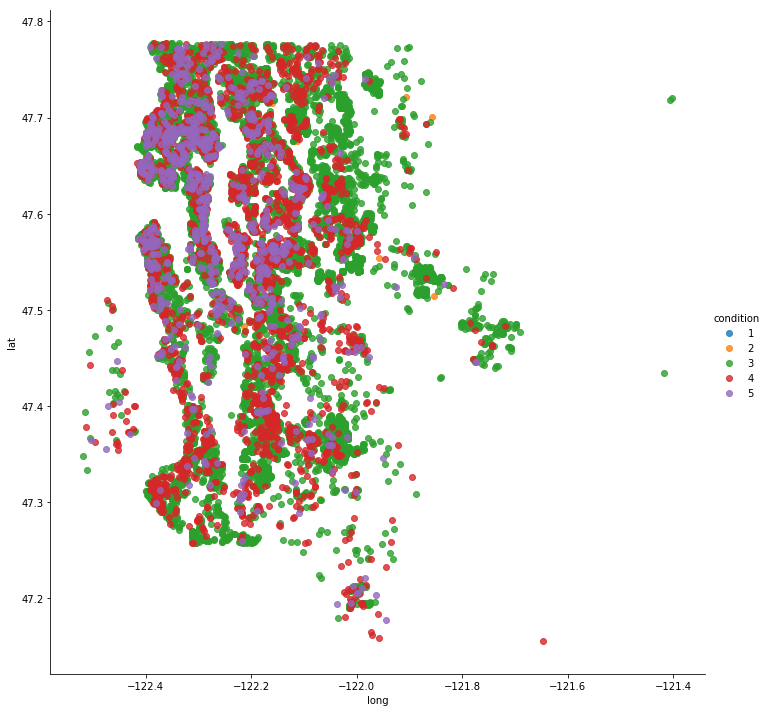

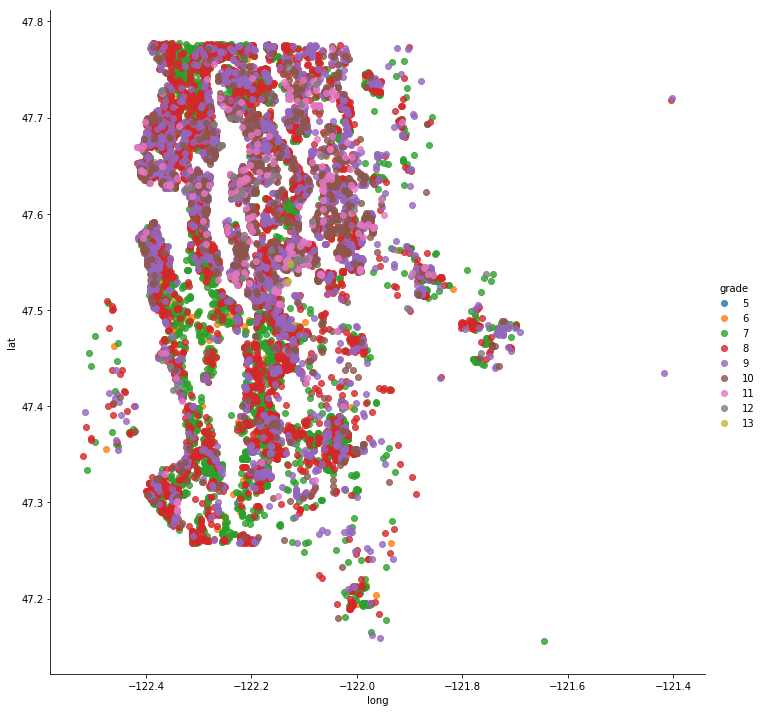

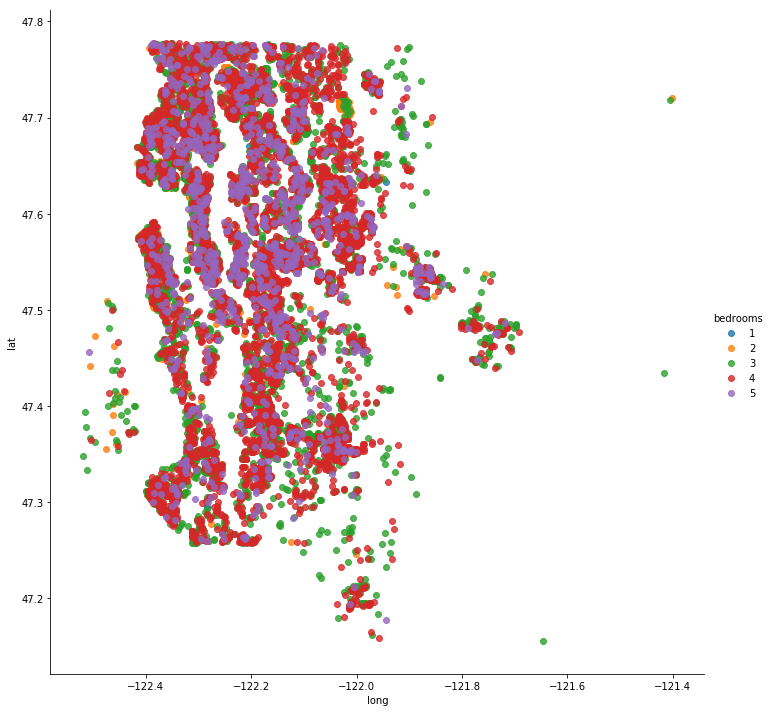

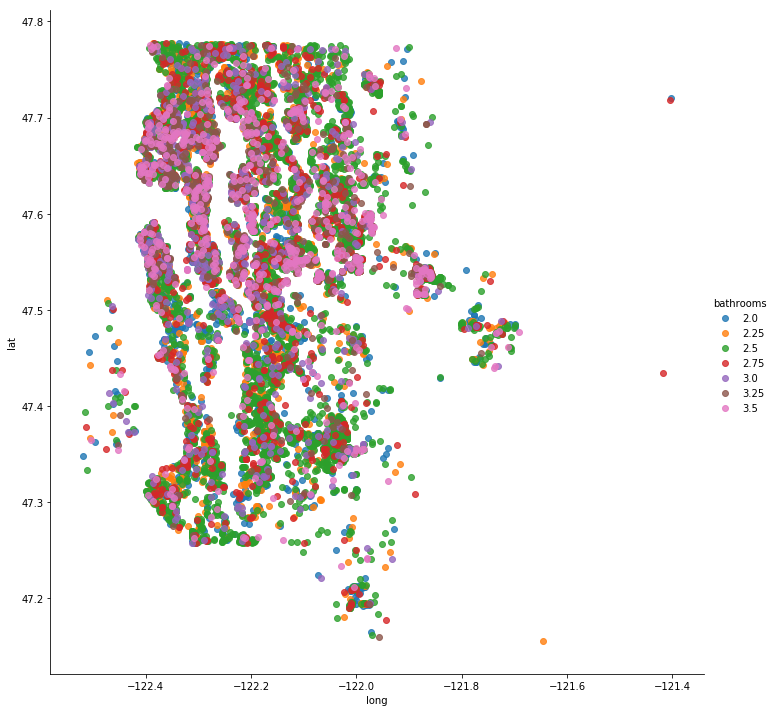

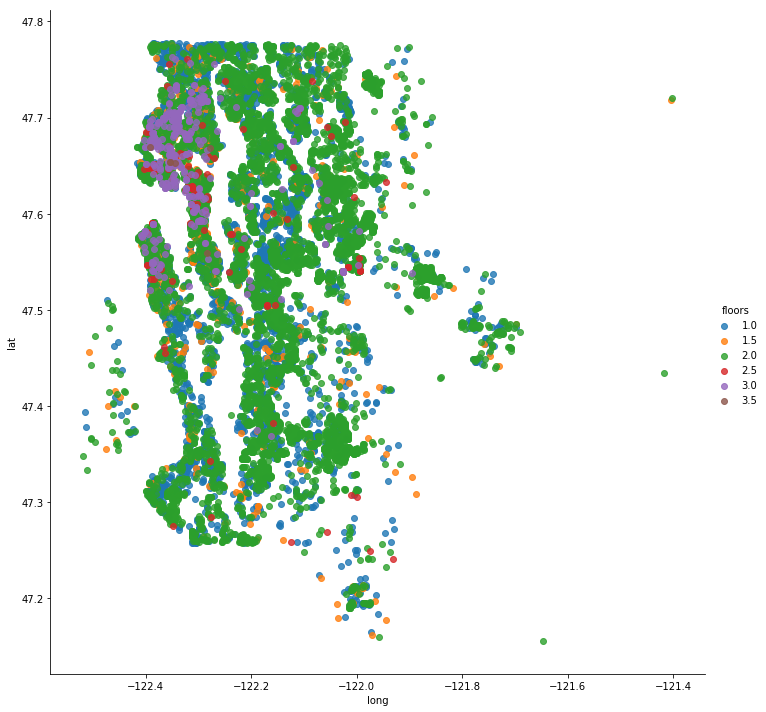

In [42]:
#remember when I graphed everything geographically
for x in ord_features:

    lmplot(data=df, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()

By comparing graphs I am guessing that view has to do with the level of obstruction of view each house has.  The houses on the water are unobstructed therefore their view is 4.  The ones more inland have a more obstructed view therefore they have a score of 3,2,or 1 or 0.  How are there so many zero's right next to the water?!

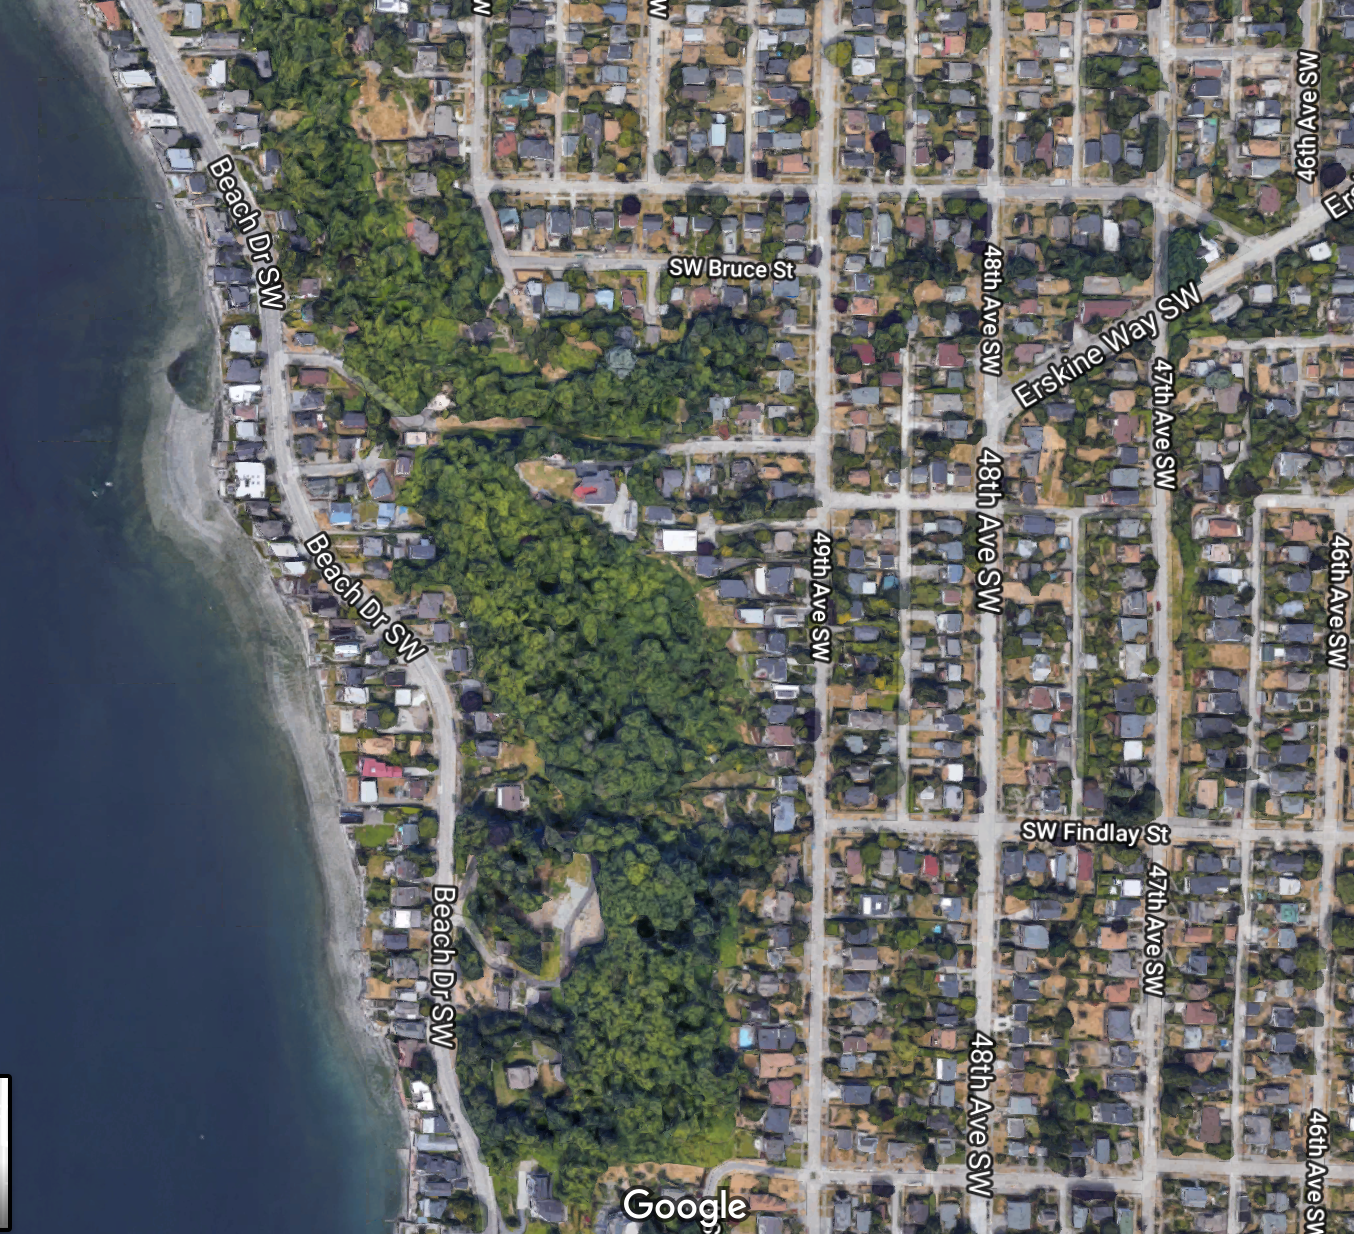

In [43]:
Image("closeup.png")

A quick glance at google maps satelite view shows what is happening. The waterfront properties which I am assuming are more expensive have their backyards filled with trees.  Making it so that the "cheaper" houses have an almost completely obstructed view.  Now I am rethinking what I did with the waterfront earlier.  

In [44]:
stats.describe(df.view)

DescribeResult(nobs=12409, minmax=(0.0, 4.0), mean=0.2598920138609074, variance=0.6459419934960166, skewness=3.1714307813357308, kurtosis=9.271071326945533)

In [45]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
1 2014-12-09  538000.0         3       2.25  0.326644     2.0       False   
3 2014-12-09  604000.0         4       3.00  0.280700     1.0       False   

   view  condition  grade  sqft_above  yr_built  zipcode      lat     long  \
1   0.0          3      7    0.546652      1951    98125  47.7210 -122.319   
3   0.0          5      7    0.322322      1965    98136  47.5208 -122.393   

   sqft_living15  sqft_lot15  renovated  basement  
1       0.525882    0.342058       True      True  
3       0.446739    0.283185      False      True

In [46]:
stats.describe(df.floors)

DescribeResult(nobs=12409, minmax=(1.0, 3.5), mean=1.6971149971794666, variance=0.28420025120075965, skewness=0.022033224700848227, kurtosis=-0.48041881384123286)

In [47]:
stats.describe(df.condition)

DescribeResult(nobs=12409, minmax=(1, 5), mean=3.34362156499315, variance=0.37611199604039386, skewness=1.4883933517081813, kurtosis=1.2538374577328568)

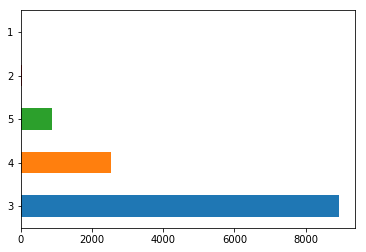

In [48]:
fig, ax = plt.subplots()
df['condition'].value_counts().plot(ax=ax, kind='barh');

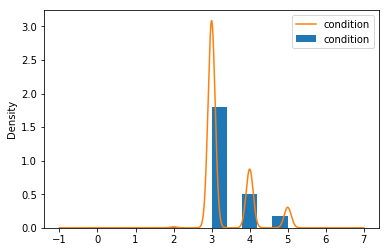

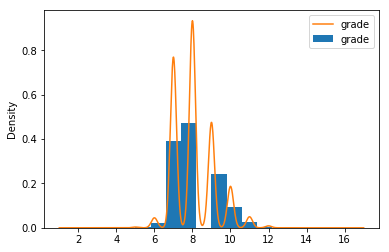

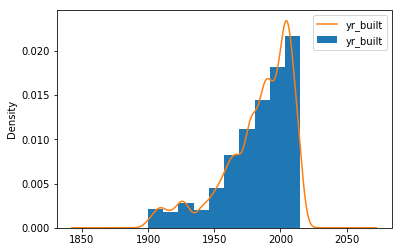

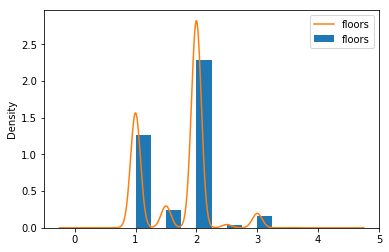

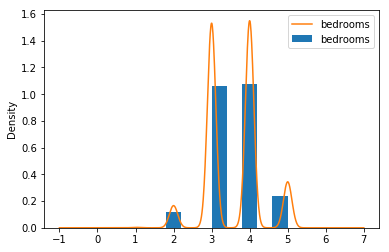

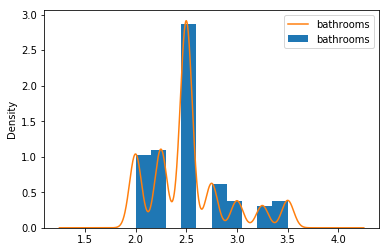

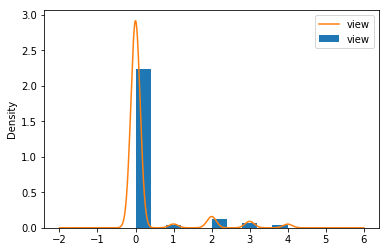

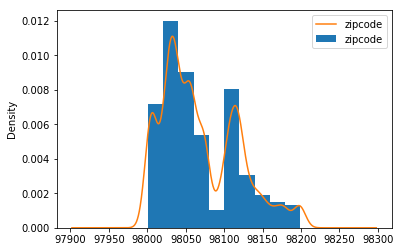

In [49]:
for column in ['condition', 'grade', 'yr_built','floors', 'bedrooms', 'bathrooms', 'view', 'zipcode']:
    df[column].plot.hist(density=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

#### I'm looking for any strategy that makes sense to bin the yr_built<br>
Sturge’s Rule: k = 1 + 3.322(log10 n),<br>
k is the number of classes,<br>
n is the size of the data.<br>
k = 1 + 3.322(log10 12409) = 14.5993935983<br>
**so, this would recommend 14 to 15 bins**<br>
However, I want my bins to contain closer to equal value_counts not equally spaced bins<br>
**So I am doing research on home construction in USA by date**<br>
Homes built between **1890 and 1940 -- before World War II -- were dubbed pre-war.** At the time, houses started changing, shifting from functional farmhouses and Victorian mansions, to a happy medium of two-storied houses and a basement.<br>
Housing from the Post-War Boom<br>

America grew rapidly from the **1940s through the 1970s**, starting with the end of the Great Depression until the recession in the early 1980s. (the 1980's recession began July 1981 ending November 1982)<br>
Most houses listed are after 1982.  So, it makes sense to break these into decades.

In [50]:
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [1800, 1940, 1982 , 1990, 2000, 2010, 2020]
# use pd.cut
bins_year = pd.cut(df['yr_built'], bins)

In [51]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_year = bins_year.cat.as_unordered()
bins_year.head()

1    (1940, 1982]
3    (1940, 1982]
4    (1982, 1990]
6    (1990, 2000]
9    (2000, 2010]
Name: yr_built, dtype: category
Categories (6, interval[int64]): [(1800, 1940], (1940, 1982], (1982, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]

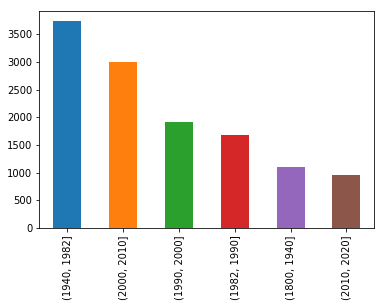

In [52]:
# inspect the result
bins_year.value_counts().plot(kind='bar');

In [53]:
# replace the existing "yr_built" column
df["yr_built"]=bins_year

In [54]:
(df["yr_built"]).describe()

count            12409
unique               6
top       (1940, 1982]
freq              3743
Name: yr_built, dtype: object

In [55]:
df.yr_built.isnull().sum()

0

In [56]:
df.shape

(12409, 19)

In [57]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
1 2014-12-09  538000.0         3       2.25  0.326644     2.0       False   
3 2014-12-09  604000.0         4       3.00  0.280700     1.0       False   

   view  condition  grade  sqft_above      yr_built  zipcode      lat  \
1   0.0          3      7    0.546652  (1940, 1982]    98125  47.7210   
3   0.0          5      7    0.322322  (1940, 1982]    98136  47.5208   

      long  sqft_living15  sqft_lot15  renovated  basement  
1 -122.319       0.525882    0.342058       True      True  
3 -122.393       0.446739    0.283185      False      True

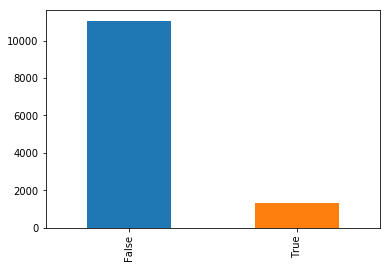

In [58]:
#checking to see if setting view as boolean would help with the heavy skew towards 0
df.view.astype(bool).value_counts().plot(kind='bar');

It doesn't look as though view is salvagable.  I am going to drop it.

In [59]:
df = df.drop(["view"], axis=1)

In [60]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
1 2014-12-09  538000.0         3       2.25  0.326644     2.0       False   
3 2014-12-09  604000.0         4       3.00  0.280700     1.0       False   

   condition  grade  sqft_above      yr_built  zipcode      lat     long  \
1          3      7    0.546652  (1940, 1982]    98125  47.7210 -122.319   
3          5      7    0.322322  (1940, 1982]    98136  47.5208 -122.393   

   sqft_living15  sqft_lot15  renovated  basement  
1       0.525882    0.342058       True      True  
3       0.446739    0.283185      False      True

In [61]:
stats.describe(df.condition)

DescribeResult(nobs=12409, minmax=(1, 5), mean=3.34362156499315, variance=0.37611199604039386, skewness=1.4883933517081813, kurtosis=1.2538374577328568)

Condition has so many scores of 3 that it is skewed to the left quite a bit.  But, I am keeping it as is and will scale in a moment.

In [62]:
stats.describe(df.grade)

DescribeResult(nobs=12409, minmax=(5, 13), mean=8.067048110242565, variance=1.128805284677481, skewness=0.722765024825503, kurtosis=0.5265670762447727)

grade is normalized 

In [63]:
stats.describe(df.zipcode)

DescribeResult(nobs=12409, minmax=(98001, 98199), mean=98068.91240228867, variance=2474.447919188248, skewness=0.6985865800990245, kurtosis=-0.317918058864727)

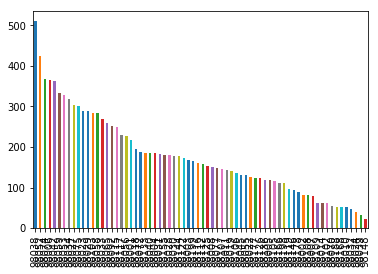

In [64]:
df.zipcode.value_counts().plot(kind='bar');

zipcode is a categorical variable.

In [65]:
df.zipcode.value_counts().shape

(70,)

70 seems like a lot of dummy variables.  I want to reduce this using binning.

In [66]:
#find the range of zipcodes
98199-98001

198

In [67]:
# I'll put 40 zipcodes in each bin and see what happens with 5 bins

198/10

19.8

In [68]:
# first, create bins for based on the values observed.
zipbins = [98001, 98021, 98031, 98041, 
           98061 ,98101, 98121, 
           98141, 98200]
# use pd.cut
bins_zip = pd.cut(df['zipcode'], zipbins)

In [69]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_zip = bins_zip.cat.as_unordered()
bins_zip.head(2)

1    (98121, 98141]
3    (98121, 98141]
Name: zipcode, dtype: category
Categories (8, interval[int64]): [(98001, 98021], (98021, 98031], (98031, 98041], (98041, 98061], (98061, 98101], (98101, 98121], (98121, 98141], (98141, 98200]]

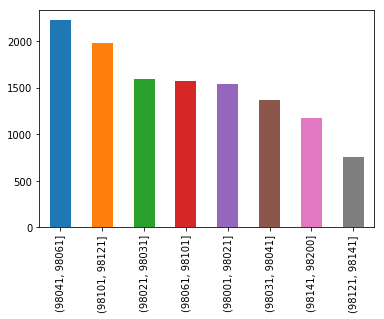

In [70]:
# inspect the result
bins_zip.value_counts().plot(kind='bar');

In [71]:
bins_zip.value_counts()

(98041, 98061]    2221
(98101, 98121]    1973
(98021, 98031]    1591
(98061, 98101]    1570
(98001, 98021]    1543
(98031, 98041]    1362
(98141, 98200]    1178
(98121, 98141]     753
Name: zipcode, dtype: int64

In [72]:
df.shape


(12409, 18)

In [73]:
12409/10

1240.9

In [74]:
zipbins = [98000, 98011, 98028, 98035, 98045,
         98057 ,98073, 98103, 
           98117, 98143, 98200]
# use pd.cut
bins_zip = pd.cut(df['zipcode'], zipbins)
bins_zip = bins_zip.cat.as_unordered()

In [75]:
bins_zip.value_counts()

(98000, 98011]    1558
(98073, 98103]    1415
(98103, 98117]    1335
(98028, 98035]    1286
(98035, 98045]    1222
(98143, 98200]    1178
(98011, 98028]    1143
(98057, 98073]    1118
(98045, 98057]    1109
(98117, 98143]    1045
Name: zipcode, dtype: int64

In [76]:
# replace the existing "zipcode" column
df["zipcode"]=bins_zip

In [77]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
1 2014-12-09  538000.0         3       2.25  0.326644     2.0       False   
3 2014-12-09  604000.0         4       3.00  0.280700     1.0       False   

   condition  grade  sqft_above      yr_built         zipcode      lat  \
1          3      7    0.546652  (1940, 1982]  (98117, 98143]  47.7210   
3          5      7    0.322322  (1940, 1982]  (98117, 98143]  47.5208   

      long  sqft_living15  sqft_lot15  renovated  basement  
1 -122.319       0.525882    0.342058       True      True  
3 -122.393       0.446739    0.283185      False      True

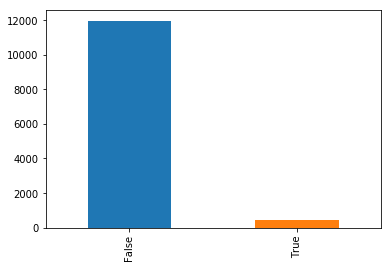

In [78]:
df.renovated.value_counts().plot(kind='bar');

In [79]:
df.renovated.value_counts()

False    11969
True       440
Name: renovated, dtype: int64

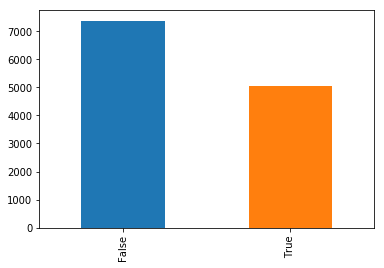

In [80]:
df.basement.value_counts().plot(kind='bar');

At this point I had to go back and un-drop waterfront.

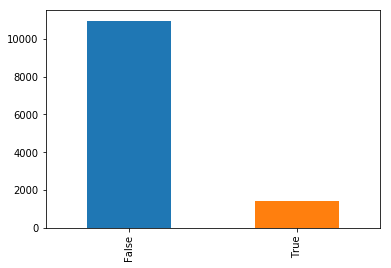

In [81]:
df.waterfront.value_counts().plot(kind='bar');

In [82]:
df.waterfront.value_counts()

False    10975
True      1434
Name: waterfront, dtype: int64

My theory is that waterfront properties will cost significantly more than non-waterfront properties with similar features.  The problem is that there are so many False in relation to True values that it is highly probable to mess up my regression model if I leave these properties in my dataset.

In [83]:
# only the waterfront == False values will remain 
# ~ inverts the boolean statement 
#df = df[df.waterfront] would keep only waterfront properties

df = df[~df.waterfront]

In [84]:
df.waterfront.value_counts()

False    10975
Name: waterfront, dtype: int64

In [85]:
df = df.drop(["waterfront"], axis=1)

In [86]:
df.renovated.value_counts()

False    10607
True       368
Name: renovated, dtype: int64

In [87]:
df = df[~df.renovated]

In [88]:
df.renovated.value_counts()

False    10607
Name: renovated, dtype: int64

In [89]:
df = df.drop(["renovated"], axis=1)

In [90]:
df.head()

date     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
3  2014-12-09  604000.0         4       3.00  0.280700     1.0          5   
4  2015-02-18  510000.0         3       2.00  0.340224     1.0          3   
6  2014-06-27  257500.0         3       2.25  0.319180     2.0          3   
9  2015-03-12  323000.0         3       2.50  0.314378     2.0          3   
14 2015-03-12  530000.0         5       2.00  0.276923     1.5          3   

    grade  sqft_above      yr_built         zipcode      lat     long  \
3       7    0.322322  (1940, 1982]  (98117, 98143]  47.5208 -122.393   
4       8    0.467563  (1982, 1990]  (98073, 98103]  47.6168 -122.045   
6       7    0.473935  (1990, 2000]  (98000, 98011]  47.3097 -122.327   
9       7    0.503961  (2000, 2010]  (98035, 98045]  47.3684 -122.031   
14      7    0.490595  (1800, 1940]  (98103, 98117]  47.6700 -122.394   

    sqft_living15  sqft_lot15  basement  
3        0.446739    0.283185      True  
4        0.548854    0.339562     False  
6        0.628199    0.326284     False  
9        0.652137    0.340797     False  
14       0.446739    0.278954     False

In [91]:
df.head()

date     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
3  2014-12-09  604000.0         4       3.00  0.280700     1.0          5   
4  2015-02-18  510000.0         3       2.00  0.340224     1.0          3   
6  2014-06-27  257500.0         3       2.25  0.319180     2.0          3   
9  2015-03-12  323000.0         3       2.50  0.314378     2.0          3   
14 2015-03-12  530000.0         5       2.00  0.276923     1.5          3   

    grade  sqft_above      yr_built         zipcode      lat     long  \
3       7    0.322322  (1940, 1982]  (98117, 98143]  47.5208 -122.393   
4       8    0.467563  (1982, 1990]  (98073, 98103]  47.6168 -122.045   
6       7    0.473935  (1990, 2000]  (98000, 98011]  47.3097 -122.327   
9       7    0.503961  (2000, 2010]  (98035, 98045]  47.3684 -122.031   
14      7    0.490595  (1800, 1940]  (98103, 98117]  47.6700 -122.394   

    sqft_living15  sqft_lot15  basement  
3        0.446739    0.283185      True  
4        0.548854    0.339562     False  
6        0.628199    0.326284     False  
9        0.652137    0.340797     False  
14       0.446739    0.278954     False

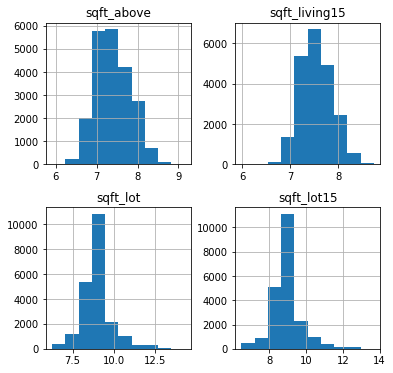

In [92]:
data_log.hist(figsize  = [6, 6]);

In [93]:
np.min(df.floors)

1.0

In [94]:
df.head(1)

date     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
3 2014-12-09  604000.0         4        3.0    0.2807     1.0          5   

   grade  sqft_above      yr_built         zipcode      lat     long  \
3      7    0.322322  (1940, 1982]  (98117, 98143]  47.5208 -122.393   

   sqft_living15  sqft_lot15  basement  
3       0.446739    0.283185      True

In [95]:
bed = df["bedrooms"]
bath = df["bathrooms"]
floors = df["floors"]
condition = df["condition"]
grade = df["grade"]

In [96]:
# minmax scaling
df["bedrooms"] = (bed-min(bed))/(max(bed)-min(bed))
df["bathrooms"] = (bath-min(bath))/(max(bath)-min(bath))
df["floors"] = (floors-min(floors))/(max(floors)-min(floors))
df["condition"] = (condition-min(condition))/(max(condition)-min(condition))
df["grade"] = (grade-min(grade))/(max(grade)-min(grade))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


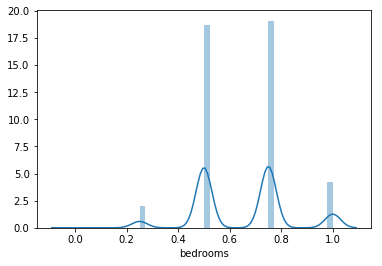

In [97]:
sns.distplot(df.bedrooms)

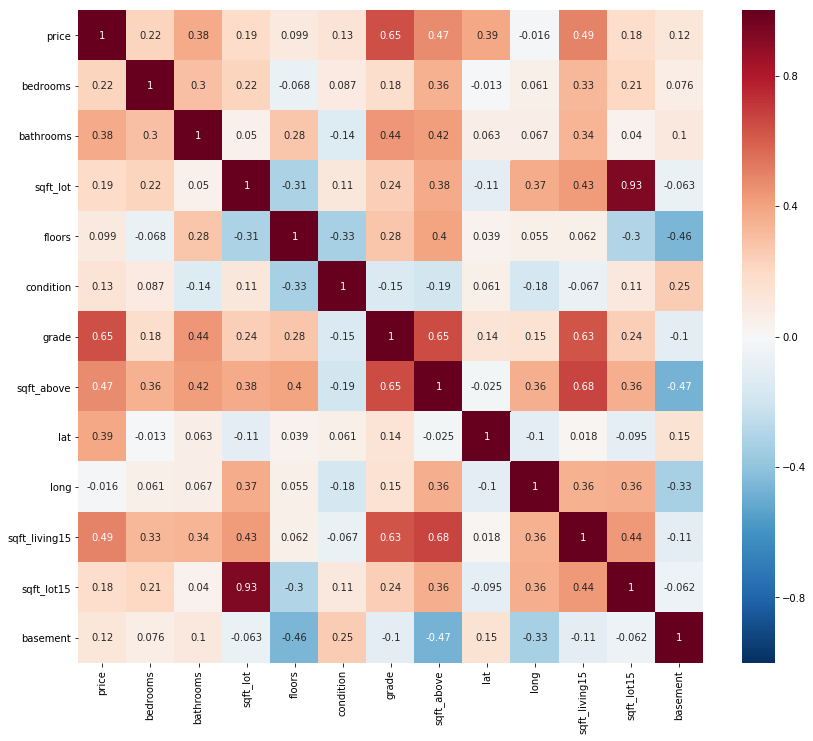

In [98]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")

In [99]:
df = df.drop(["sqft_lot15"], axis=1)

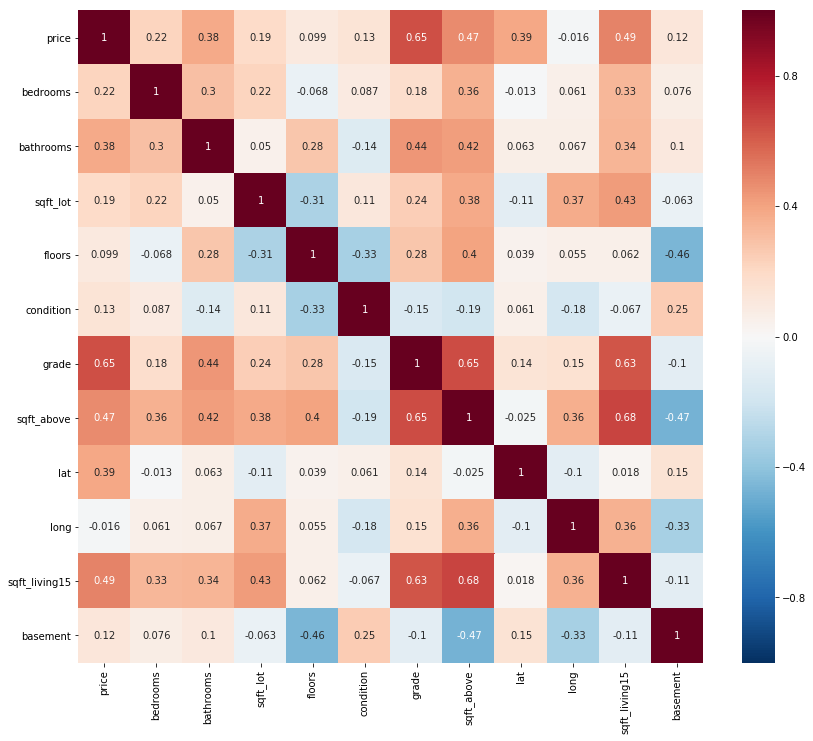

In [100]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")

In [101]:
df = df.drop(["sqft_living15"], axis=1)

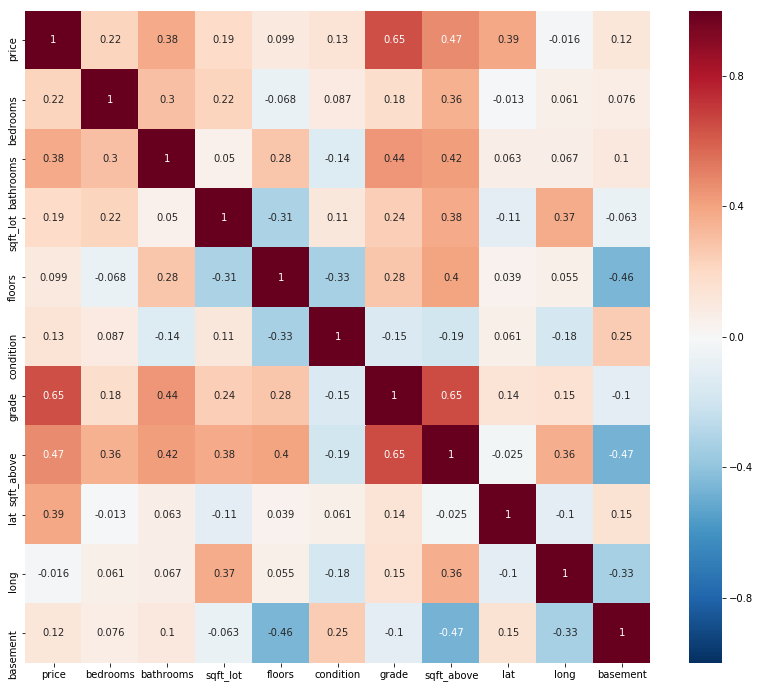

In [102]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")

In [103]:
df.basement.dtypes

dtype('bool')

In [104]:
df.basement.value_counts()

False    6390
True     4217
Name: basement, dtype: int64

In [105]:
df.isnull().sum()

date          0
price         0
bedrooms      0
bathrooms     0
sqft_lot      0
floors        0
condition     0
grade         0
sqft_above    0
yr_built      0
zipcode       0
lat           0
long          0
basement      0
dtype: int64

In [106]:
abs(df.corr())>0.75

price  bedrooms  bathrooms  sqft_lot  floors  condition  grade  \
price        True     False      False     False   False      False  False   
bedrooms    False      True      False     False   False      False  False   
bathrooms   False     False       True     False   False      False  False   
sqft_lot    False     False      False      True   False      False  False   
floors      False     False      False     False    True      False  False   
condition   False     False      False     False   False       True  False   
grade       False     False      False     False   False      False   True   
sqft_above  False     False      False     False   False      False  False   
lat         False     False      False     False   False      False  False   
long        False     False      False     False   False      False  False   
basement    False     False      False     False   False      False  False   

            sqft_above    lat   long  basement  
price            False  False  False     False  
bedrooms         False  False  False     False  
bathrooms        False  False  False     False  
sqft_lot         False  False  False     False  
floors           False  False  False     False  
condition        False  False  False     False  
grade            False  False  False     False  
sqft_above        True  False  False     False  
lat              False   True  False     False  
long             False  False   True     False  
basement         False  False  False      True

In [107]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
3 2014-12-09  604000.0      0.75   0.666667  0.280700     0.0        1.0   
4 2015-02-18  510000.0      0.50   0.000000  0.340224     0.0        0.5   

   grade  sqft_above      yr_built         zipcode      lat     long  basement  
3  0.250    0.322322  (1940, 1982]  (98117, 98143]  47.5208 -122.393      True  
4  0.375    0.467563  (1982, 1990]  (98073, 98103]  47.6168 -122.045     False

Model Fitting

In [108]:
#yr_built_dummy = pd.get_dummies(bins_year, prefix="yr")
#zip_dummy = pd.get_dummies(bins_zip, prefix="zip")
#df = df.drop(["yr_built"], axis=1)
#df = pd.concat([df, yr_built_dummy, zip_dummy], axis=1)



In [109]:
#import statsmodels.api as sm

#def stepwise_selection(X, y, 
#                       initial_list=[], 
#                      threshold_in=0.01, 
#                       threshold_out = 0.05, 
#                       verbose=True):
#    """ Perform a forward-backward feature selection 
#    based on p-value from statsmodels.api.OLS
#    Arguments:
#        X - pandas.DataFrame with candidate features
#        y - list-like with the target
#        initial_list - list of features to start with (column names of X)
#        threshold_in - include a feature if its p-value < threshold_in
#        threshold_out - exclude a feature if its p-value > threshold_out
#        verbose - whether to print the sequence of inclusions and exclusions
#    Returns: list of selected features 
#    Always set threshold_in < threshold_out to avoid infinite looping.
#    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
#    """
#    included = list(initial_list)
#    while True:
#        changed=False
#        # forward step
#        excluded = list(set(X.columns)-set(included))
#        new_pval = pd.Series(index=excluded)
#        for new_column in excluded:
#            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#            new_pval[new_column] = model.pvalues[new_column]
#        best_pval = new_pval.min()
#        if best_pval < threshold_in:
#            best_feature = new_pval.idxmin()
#            included.append(best_feature)
#            changed=True
#            if verbose:
#                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))#

        # backward step
#        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
#        pvalues = model.pvalues.iloc[1:]
#        worst_pval = pvalues.max() # null if pvalues is empty
#        if worst_pval > threshold_out:
#            changed=True
#            worst_feature = pvalues.idxmax()
#           included.remove(worst_feature)
 #           if verbose:
 #               print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#        if not changed:
 #           break
 #   return included

In [110]:
X = df.select_dtypes(include=['float64'])
y = pd.DataFrame(df, columns= ["price"])

In [111]:
y;

In [112]:
# result = stepwise_selection(X.select_dtypes(include=['float64']), y, verbose = True)


In [113]:
#result

In [114]:
import statsmodels.api as sm
X_fin = X[["sqft_lot", "sqft_above", "bedrooms", "grade", "bathrooms", "floors", "condition"]]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1512.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:23:33   Log-Likelihood:            -1.4553e+05
No. Observations:               10607   AIC:                         2.911e+05
Df Residuals:                   10599   BIC:                         2.911e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.021e+05   1.48e+04    -27.118      0.000   -4.31e+05   -3.73e+05
sqft_lot   -1.904e+05   2.31e+04     -8.232      0.000   -2.36e+05   -1.45e+05
sqft_above  4.278e+05    3.2e+04     13.374      0.000    3.65e+05    4.91e+05
bedrooms     2.94e+04   1.35e+04      2.181      0.029    2973.844    5.58e+04
grade       1.339e+06   2.22e+04     60.206      0.000     1.3e+06    1.38e+06
bathrooms   1.506e+05   9872.084     15.254      0.000    1.31e+05     1.7e+05
floors      -1.45e+05   1.38e+04    -10.532      0.000   -1.72e+05   -1.18e+05
condition   4.849e+05   1.49e+04     32.643      0.000    4.56e+05    5.14e+05
==============================================================================
Omnibus:                     5222.235   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69385.921
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      14.852   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel())

In [116]:
selector.support_ 

array([ True, False, False,  True,  True, False,  True, False,  True,
       False])

In [117]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
yhat = linreg.predict(X[selected_columns])

In [120]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [121]:
r_squared

price    1.0
dtype: float64

In [122]:
adjusted_r_squared

price    1.0
dtype: float64

In [123]:
#df.drop('yr_built', inplace=True, axis=1)

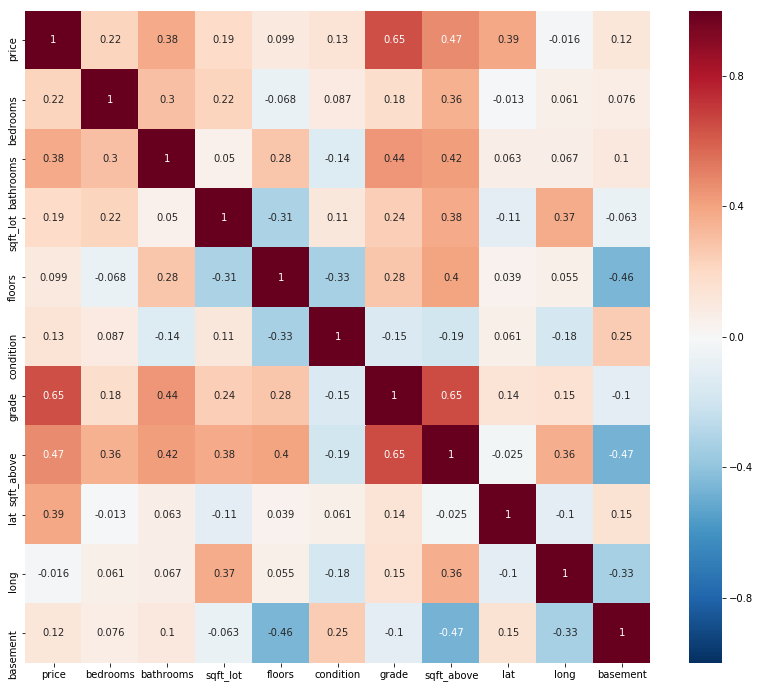

In [124]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")

In [125]:
#df.drop('date', inplace=True, axis=1)

In [126]:
#df.drop('zipcode', inplace=True, axis=1)

In [127]:
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X, y.values.ravel())
selector.support_ 

array([ True, False, False,  True, False, False,  True, False,  True,
       False])

In [128]:
df.head(1)

date     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
3 2014-12-09  604000.0      0.75   0.666667    0.2807     0.0        1.0   

   grade  sqft_above      yr_built         zipcode      lat     long  basement  
3   0.25    0.322322  (1940, 1982]  (98117, 98143]  47.5208 -122.393      True

In [129]:
X.head()

price  bedrooms  bathrooms  sqft_lot  floors  condition  grade  \
3   604000.0      0.75   0.666667  0.280700     0.0        1.0  0.250   
4   510000.0      0.50   0.000000  0.340224     0.0        0.5  0.375   
6   257500.0      0.50   0.166667  0.319180     0.4        0.5  0.250   
9   323000.0      0.50   0.333333  0.314378     0.4        0.5  0.250   
14  530000.0      1.00   0.000000  0.276923     0.2        0.5  0.250   

    sqft_above      lat     long  
3     0.322322  47.5208 -122.393  
4     0.467563  47.6168 -122.045  
6     0.473935  47.3097 -122.327  
9     0.503961  47.3684 -122.031  
14    0.490595  47.6700 -122.394

# Oh Shit!  Should price be within X?  Is that what is messing up everything?  Please be this simple.

In [130]:
names = list(X[:0])

In [131]:
names

['price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'lat',
 'long']

In [132]:


#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))


Features sorted by their rank:
[(1, 'price'), (2, 'grade'), (3, 'lat'), (4, 'sqft_lot'), (5, 'floors'), (6, 'bathrooms'), (7, 'sqft_above'), (8, 'bedrooms'), (9, 'long'), (10, 'condition')]


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
X.head()

price  bedrooms  bathrooms  sqft_lot  floors  condition  grade  \
3   604000.0      0.75   0.666667  0.280700     0.0        1.0  0.250   
4   510000.0      0.50   0.000000  0.340224     0.0        0.5  0.375   
6   257500.0      0.50   0.166667  0.319180     0.4        0.5  0.250   
9   323000.0      0.50   0.333333  0.314378     0.4        0.5  0.250   
14  530000.0      1.00   0.000000  0.276923     0.2        0.5  0.250   

    sqft_above      lat     long  
3     0.322322  47.5208 -122.393  
4     0.467563  47.6168 -122.045  
6     0.473935  47.3097 -122.327  
9     0.503961  47.3684 -122.031  
14    0.490595  47.6700 -122.394

In [134]:
X.drop('price',inplace=True,axis=1)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [135]:
X.head()

bedrooms  bathrooms  sqft_lot  floors  condition  grade  sqft_above  \
3       0.75   0.666667  0.280700     0.0        1.0  0.250    0.322322   
4       0.50   0.000000  0.340224     0.0        0.5  0.375    0.467563   
6       0.50   0.166667  0.319180     0.4        0.5  0.250    0.473935   
9       0.50   0.333333  0.314378     0.4        0.5  0.250    0.503961   
14      1.00   0.000000  0.276923     0.2        0.5  0.250    0.490595   

        lat     long  
3   47.5208 -122.393  
4   47.6168 -122.045  
6   47.3097 -122.327  
9   47.3684 -122.031  
14  47.6700 -122.394

In [136]:
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X, y.values.ravel())
selector.support_

array([False, False, False, False,  True,  True,  True,  True, False])

In [137]:
X_fin = X[["sqft_above", "bedrooms", "floors", "condition", "grade"]]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1994.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:23:34   Log-Likelihood:            -1.4569e+05
No. Observations:               10607   AIC:                         2.914e+05
Df Residuals:                   10601   BIC:                         2.914e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.454e+05   1.48e+04    -30.054      0.000   -4.74e+05   -4.16e+05
sqft_above   3.26e+05   2.86e+04     11.400      0.000     2.7e+05    3.82e+05
bedrooms    8.511e+04   1.33e+04      6.422      0.000    5.91e+04    1.11e+05
floors     -5.611e+04   1.19e+04     -4.733      0.000   -7.94e+04   -3.29e+04
condition   4.666e+05    1.5e+04     31.037      0.000    4.37e+05    4.96e+05
grade       1.426e+06   2.18e+04     65.466      0.000    1.38e+06    1.47e+06
==============================================================================
Omnibus:                     5239.708   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68835.122
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      14.790   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
X.head(1)

bedrooms  bathrooms  sqft_lot  floors  condition  grade  sqft_above  \
3      0.75   0.666667    0.2807     0.0        1.0   0.25    0.322322   

       lat     long  
3  47.5208 -122.393

In [139]:
feat1= pd.DataFrame([])

In [140]:
feat1= X.drop(['bedrooms','bathrooms','floors','condition','long','lat'], axis=1)

In [141]:
feat1.head()

sqft_lot  grade  sqft_above
3   0.280700  0.250    0.322322
4   0.340224  0.375    0.467563
6   0.319180  0.250    0.473935
9   0.314378  0.250    0.503961
14  0.276923  0.250    0.490595

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(feat1, y)

In [144]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

7955 2652 7955 2652


In [145]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [148]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 55655127114.29527
Test Mean Squarred Error: 57067147610.77935


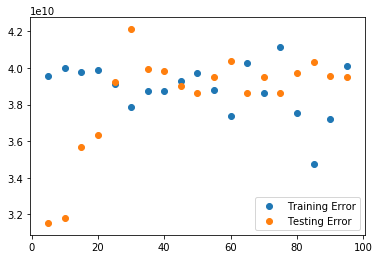

In [151]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend();

Something is messed up I am going to iterate through RFE again. And, I know I should use a foor loop I need to go back and fix this once I have more time.

In [169]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.505928
dtype: float64

In [168]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.519253
dtype: float64

In [167]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.569615
dtype: float64

In [162]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.578822
dtype: float64

In [164]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 6)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.585074
dtype: float64

In [165]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 7)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.595249
dtype: float64

In [166]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 8)
selector = selector.fit(X, y)
selector.support_ 
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


price    0.595277
dtype: float64

Anything after 4 features shows very little improvement.  So, in reference to the ranking I should use (1, 'grade'), (2, 'lat'), (3, 'sqft_lot'), (4, 'floors') as my first model.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))


7955 2652 7955 2652


In [ ]:
linreg.fit(X_train, y_train)
#Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#Calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#Calculating Mean Squared Error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Oh Shit 2!  mean squared error too high!

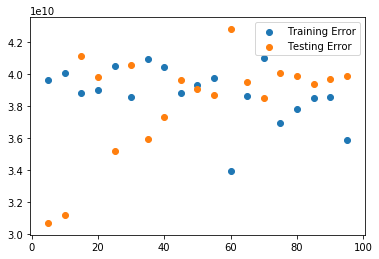

In [174]:
# Evaluate train test split size
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

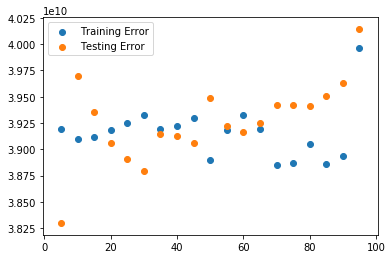

In [175]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [179]:
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

In [180]:
cv_5_results

array([-4.02952021e+10, -4.30239342e+10, -4.01791921e+10, -4.07216427e+10,
       -3.19332557e+10])